In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# In this project I will be looking at the Boston Weather 2013-2023 dataset. 
# The dataset is a CSV file with 8 fields and 1 record per day for the last ten years.
# The fields are time- the date, tavg- average temp in Celsius, tmin- minimum recorded temp in Celsius
# tmax- maximum recorded temp in Celsius, prcp- precipitation total in millimeters, wdir- average wind direction in degrees
# wspd- wind speed in kilometers per hour, pres- average sea-level air pressure in hectopascals.
# I will analyze this data to identify trends and correlations that can provide useful insights.

In [3]:
# Load the data from CSV file
bwd = pd.read_csv('boston_weather_data.csv')

# Show the first 5 rows of the data
print(bwd.head())

         time  tavg  tmin  tmax  prcp   wdir  wspd    pres
0  2013-03-01   3.2   1.1   5.0   0.0  342.0  15.1  1002.7
1  2013-03-02   3.1   1.1   5.6   0.0  307.0  14.4  1004.2
2  2013-03-03   2.6   0.6   6.1   0.0    NaN  14.4  1002.6
3  2013-03-04   1.8  -0.6   5.0   0.0  303.0  28.1  1003.0
4  2013-03-05   2.9   0.0   6.1   0.0    NaN  16.6  1013.5


In [4]:
# I see some null values in the wind direction field, so I will check the data set for null values
# Check for any missing values
print(bwd.isnull().sum())

time      0
tavg      1
tmin      0
tmax      0
prcp      0
wdir    587
wspd      0
pres    161
dtype: int64


In [5]:
# We have 1 missing data point from tavg, 161 missing data points from pres, and 587 missing data points from wdir
# I believe that the data we have is sufficient for an accurate analysis, so I keep those rows and not alter the null values

In [6]:
# Convert time column to datetime format
bwd['time'] = pd.to_datetime(bwd['time'])

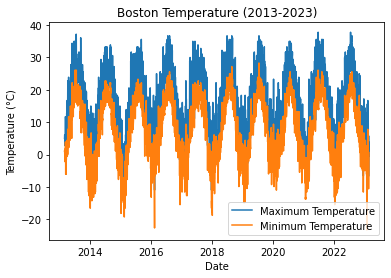

In [7]:
# To get a general overview of my data,
# I will plot the maximum and minimum temperature for every day over the ten year time frame
plt.plot(bwd['time'], bwd['tmax'], label='Maximum Temperature')
plt.plot(bwd['time'], bwd['tmin'], label='Minimum Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Boston Temperature (2013-2023)')
plt.legend()
plt.show()

In [8]:
# So far it looks as expected
# I will start my analysis by looking at the wind

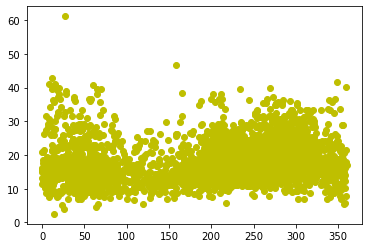

In [9]:
# Looking for any trend between wind speed and the direction
plt.plot(bwd['wdir'], bwd['wspd'], 'yo')

In [10]:
# It seems that wind speed decreases between 100 and 150 degrees for some reason

In [11]:
# Is the direction of the wind equally distributed?

In [12]:
# Creating a histogram to see the frequency of each direction divided into 8 categories
hist, bins = np.histogram(bwd['wdir'], 8, [0, 360])
print(hist)
print(bins)

[326 373 134 179 494 631 644 285]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [13]:
# There does appear to be a significant disparity between frequency of wind directions

In [14]:
# I will now define a funcion to create a polar chart visualizing the disparity

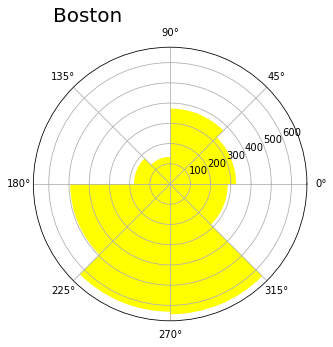

In [15]:
def polar_chart(hist, mv):
    N = 8
    theta = np.arange(0.,2*np.pi,2*np.pi/N)
    radii = np.array(hist)
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
    colors = [(1-x/mv, 1-x/mv, 0.75) for x in radii]
    plt.bar(theta + np.pi / 8, radii, width=(2*np.pi/N), bottom=0.0, color='yellow')
    plt.title("Boston", x= 0.2, fontsize=20)
polar_chart(hist, max(hist))

In [16]:
# This polar chart is misleading because in wind direction 0 degrees indicates pointing North,
# whereas mathematically, on a cartesian plane, 0 degrees points in the positive direction of the x axis.
# This translates to East geographically
# In order to represent the wind direction more intuitively, we must rotate the values 90 degrees clockwise.

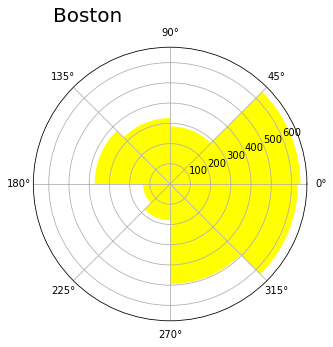

In [17]:
def polar_chart(hist, mv):
    N = 8
    theta = np.arange(0.,2*np.pi,2*np.pi/N)
    radii = np.array(hist)
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
    colors = [(1-x/mv, 1-x/mv, 0.75) for x in radii]
    # Rotate values 90 degrees counter clockwise
    theta += np.pi/2
    plt.bar(theta + np.pi / 8, radii, width=(2*np.pi/N), bottom=0.0, color='yellow')
    plt.title("Boston", x= 0.2, fontsize=20)
polar_chart(hist, max(hist))

In [18]:
# This is a more intuitive view, showing that the wind generally blows the most frequently to the East

In [19]:
# I will now create an annual aggregate dataframe to analyze general weather trends over time

In [20]:
# Create a new panda dataframe with annual aggregate values
annual_agg = bwd.groupby(bwd['time'].dt.year).agg({
    'tavg': 'mean',   # Calculate the average annual temperature
    'tmin': 'min',    # Calculate the annual low
    'tmax': 'max',    # Calculate the annual high
    'prcp': 'sum',    # Calculate the cumulative annual precipitation
    'wspd': 'mean',   # Calculate the average annual wind speed
    'pres': 'mean'    # Calculate the average annual air pressure
})

# Rename the columns
annual_agg = annual_agg.rename(columns={
    'tavg': 'annual_avg',
    'tmin': 'low',
    'tmax': 'high', 
    'prcp': 'total_prcp', 
    'wspd': 'avg_wspd', 
    'pres': 'avg_pres'
})


# Print the new panda dataframe
print(annual_agg)

      annual_avg   low  high  total_prcp   avg_wspd     avg_pres
time                                                            
2013   13.233443 -12.7  37.2       865.5  16.485948  1016.793333
2014   10.560548 -16.6  33.9      1150.3  17.099452  1016.671217
2015   10.849589 -19.3  35.6       884.3  16.815068  1017.495522
2016   11.710109 -22.7  36.7       840.4  17.890164  1016.025731
2017   11.330411 -16.6  35.0      1104.6  18.310137  1016.150898
2018   11.555890 -18.8  36.7      1354.9  18.145205  1017.436842
2019   11.778356 -14.9  36.7      1281.1  18.073699  1016.196154
2020   11.830328 -11.0  35.0       954.4  17.550820  1016.327397
2021   12.458630 -13.8  37.8      1330.1  17.027671  1015.727198
2022   11.932055 -15.5  37.8       794.9  17.959452  1016.685440
2023    2.636667 -23.3  16.7       167.7  17.693333  1015.560000


In [21]:
# Now I will create a line chart to analyze any progression in average annual air pressure over the last ten years

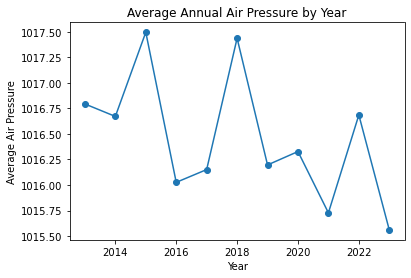

In [22]:
# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the average air pressure by year
ax.plot(annual_agg.index, annual_agg['avg_pres'], marker='o')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Air Pressure')
ax.set_title('Average Annual Air Pressure by Year')

# Show the plot
plt.show()

In [23]:
# It appears that the average annual air pressure fluctuates but shows a general trend of decline over the last ten years

In [24]:
# Now I will create a similar chart to analyze wind speed

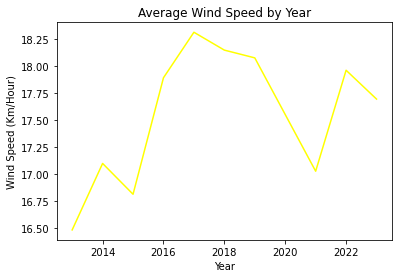

In [25]:
# Create a line chart of average wind speed by year
plt.plot(annual_agg.index, annual_agg['avg_wspd'], color='yellow')

# Set the title and axis labels
plt.title('Average Wind Speed by Year')
plt.xlabel('Year')
plt.ylabel('Wind Speed (Km/Hour)')

# Show the plot
plt.show()

In [26]:
# Average annual wind speed also fluctuates but seems to show a general trend of increasing

In [27]:
# There may be a negative correlation between air pressure and wind speed
# I want to see what this correlation is

In [28]:
# Calculate the correlation coefficient air pressure and wind speed and see if they are related
coco = bwd['wspd'].corr(bwd['pres'], method='pearson', min_periods=1)
print(coco)

-0.29936709286620067


In [29]:
# There appears to be a relatively weak negative correlation between air pressure at the sea level and wind speed

In [30]:
# I will now look at trends in precipitation

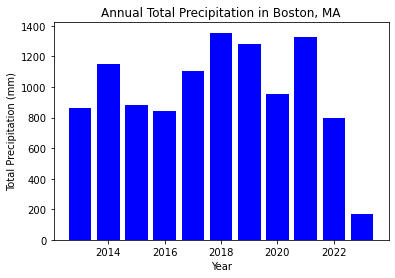

In [31]:
# This is a bar chart representing total annual precipitation, 2023 is low because the year has just started
plt.bar(annual_agg.index, annual_agg['total_prcp'], color='blue')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.title('Annual Total Precipitation in Boston, MA')
plt.show()

In [32]:
# The total annual precipitation seems to fluctuate, but shows a slight trend of increase

In [33]:
# I will now look at snowfall
# I will estimate snowfall by aggregating the precipitation of days where the average temperature was below 0 degrees Celsius

In [34]:
# Creating an estimated snowfall dataframe
snow_agg = bwd.groupby(bwd['time'].dt.year).agg({
    'prcp': lambda x: x[bwd['tavg'] < 0].sum(),   # Calculate the total snowfall
})

snow_agg = snow_agg.rename(columns={'prcp': 'snow'})

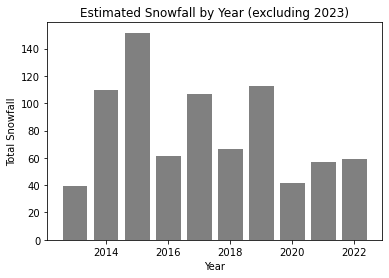

In [35]:
# Excluding 2023 from the chart because the data is incomplete
snow_agg = snow_agg.loc[snow_agg.index != 2023]

# Create the bar chart
plt.bar(snow_agg.index, snow_agg['snow'], color='gray')
plt.xlabel('Year')
plt.ylabel('Total Snowfall')
plt.title('Estimated Snowfall by Year (excluding 2023)')
plt.show()

In [36]:
# 2015 seems to be the biggest year for snow in the last ten years

In [37]:
# Let's analyze the trend with a linear regression

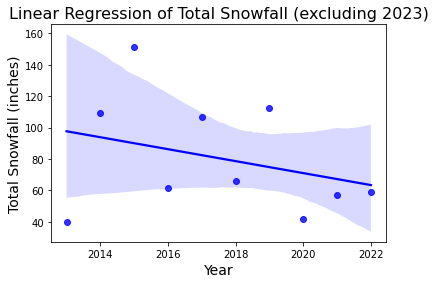

In [38]:
# Exclude the year 2023
snow_agg_exclude_2023 = snow_agg[snow_agg.index != 2023]

# Plot the regression using seaborn
sns.regplot(x=snow_agg_exclude_2023.index, y=snow_agg_exclude_2023['snow'], color='blue')

# Set the chart title and axis labels
plt.title('Linear Regression of Total Snowfall (excluding 2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Snowfall (inches)', fontsize=14)

# Display the chart
plt.show()

In [39]:
# The trend shows that annual snowfall is decreasing

In [40]:
# Now let's look at temperatures

In [41]:
# First, I will show annual lows
# 2023 is included in this chart because the data goes to March 1, 2023
# This is sufficient because January and February are usually the coldest months of the year

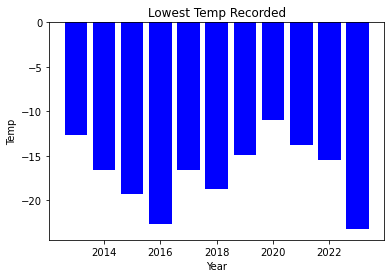

In [42]:
# Create plot
plt.bar(annual_agg.index, annual_agg['low'], color='blue')

# Set the title and axis labels
plt.title('Lowest Temp Recorded')
plt.xlabel('Year')
plt.ylabel('Temp')

# Show the plot
plt.show()

In [44]:
# It looks like this year (2023) may have had the lowest temperature recorded in the last ten years
# Let's see what it was

In [54]:
# Create a min_tmin dataframe
min_tmin = bwd[bwd['tmin'] == bwd['tmin'].min()]
# Assign variables
min_time = min_tmin['time'].values[0]
min_tmin_val = min_tmin['tmin'].values[0]
# Print results
print("Date of lowest Temp:", str(min_time)[:10])
print("Lowest Temp (Celsius):", min_tmin_val)

Date of lowest Temp: 2023-02-04
Lowest Temp (Celsius): -23.3


In [55]:
# The lowest temperature recorded in Boston in the last ten years was -23.3 degrees Celsius
# This temperature was recorded on February 4, 2023

In [56]:
# I will now exclude 2023 from the dataframe to analyze high and average temperatures

In [57]:
annual_agg = annual_agg.drop(index=2023)

In [58]:
# Let's now look at annual high temperatures

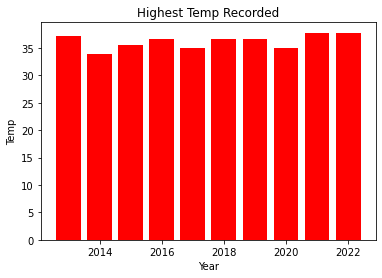

In [59]:
# Create plot
plt.bar(annual_agg.index, annual_agg['high'], color='red')

# Set the title and axis labels
plt.title('Highest Temp Recorded')
plt.xlabel('Year')
plt.ylabel('Temp')

# Show the plot
plt.show()

In [60]:
# These temperatures look relatively consistent

In [61]:
# Now let's finally look at the annual averages

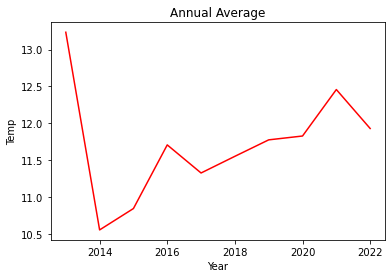

In [62]:
# Create plot
plt.plot(annual_agg.index, annual_agg['annual_avg'], color='red')

# Set the title and axis labels
plt.title('Annual Average')
plt.xlabel('Year')
plt.ylabel('Temp')

# Show the plot
plt.show()

In [63]:
# It looks like a steep drop in 2014 and then a slow upward progression since then

In [64]:
# Let's see what the linear regression shows

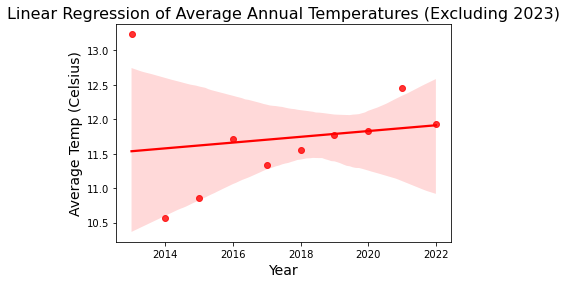

In [65]:
# Plot the regression using seaborn
sns.regplot(x=annual_agg.index, y=annual_agg['annual_avg'], color='red')

# Set the chart title and axis labels
plt.title('Linear Regression of Average Annual Temperatures (Excluding 2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temp (Celsius)', fontsize=14)

# Display the chart
plt.show()

In [66]:
# This shows that temperatures are generally increasing by the year
# The question is by how much?

In [67]:
# Extract the regression line's slope
slope, intercept = np.polyfit(annual_agg.index, annual_agg["annual_avg"], 1)
print("The trend of warming is approximately " + str(round(slope, 4)) + " degrees Celsius per year.")

The trend of warming is approximately 0.0419 degrees Celsius per year.


In [68]:
# According to this linear regression, the trend of warming is approximately 0.0419 degrees Celsius per year.

In [ ]:
# In this case study, we have found some interesting information.
# Wind in Boston generally blows from the West to the East.
# There is a weak negative correlation betweeen air pressure and wind speed of about .3.
# Air pressure and estimated snowfall are showing a general trend of decreasing.
# Wind speed, precipitation, and average temperatures are showing a general trend of increasing.
